# Notebook for doing Mollweide projection of neutrino/wimp recoil skymaps
* Plots both 6 GeV WIMP + $^8$B neutrinos on top of each other with a diverging colormap
* basemap actually still uses depracated functions, and may warn about that 
* it also throws a bunch of warnings when you do the contour plot rather than the pcolormesh (comment either one out to see how they look)
* potentially there are a still a few minus signs flying about here, but the plots look how I expect them to

To do: try and improve the plot a bit

In [155]:
from Params import *
Nuc = F19
E_th = 3.0
E_max = 50.0
tit = r"Fluorine ($E_r>3$ keV)"
fname = "Mollweide-F.pdf"

In [161]:
from Params import *
Nuc = He4
E_th = 1.0
E_max = 200.0
tit = r"Helium ($E_r>1$ keV)"
fname = "Mollweide-He.pdf"

In [162]:
from mpl_toolkits.basemap import Basemap
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from LabFuncs import *
from WIMPFuncs import *
from NeutrinoFuncs import *

n = 200
ne = 200
ph = linspace(0, 2*pi, n)
th = linspace(0,pi, n/2)
PH,TH = meshgrid(ph,th)
X = cos(PH)*sin(TH)
Y = -sin(PH)*sin(TH)
Z = cos(TH)
ii = 0
q = zeros(shape=(n*n/2,3))
for i in range(0,n/2):
    for j in range(0,n):
        q[ii,:] = array([X[i,j],Y[i,j],Z[i,j]])
        ii = ii+1

t = array([JulianDay(9,12,2018,18.0)])
DM = WIMP(10.0,1.0e-45)
HaloModel = SHM
Loc = Boulby
NuBG = GetNuFluxes(0.0,Nuc)
E_nu_all = NuBG.Energy
Flux_all = NuBG.Flux
n_nu = NuBG.NumberOfNeutrinos 
Errs = NuBG.Uncertainties


E_r_vals = linspace(E_th,E_max,ne)
dR_wimp = zeros(shape=(1,n*n/2))
dR_nu = zeros(shape=(1,n*n/2))
for i in range(0,ne):
    E = E_r_vals[i]*q
    dR_wimp = dR_wimp + dRdEdO_wimp(E,t*ones(shape=n*n/2),DM,HaloModel,Nuc,Loc)  
    dR_nu = dR_nu + dRdEdO_solarnu(E,t*ones(shape=n*n/2),E_nu_all[:,5],Flux_all[:,5],Nuc,Loc)
dR_wimp = dR_wimp/max(max(dR_wimp))
dR_nu = dR_nu/max(max(dR_nu[:]))
dR = (dR_wimp-dR_nu)

dR_map = zeros(shape=(n/2,n))
dR_mapw = zeros(shape=(n/2,n))
dR_mapn = zeros(shape=(n/2,n))
ii = 0
for i in range(0,n/2):
    for j in range(0,n):
        dR_map[i,j] = dR[0,ii]
        dR_mapw[i,j] = dR_wimp[0,ii]
        dR_mapn[i,j] = dR_nu[0,ii]
        ii = ii+1

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).WARNING: x coordinate not montonically increasing - contour plot
may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).WARNING: x coordinate not montonically increasing - contour plot
may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see

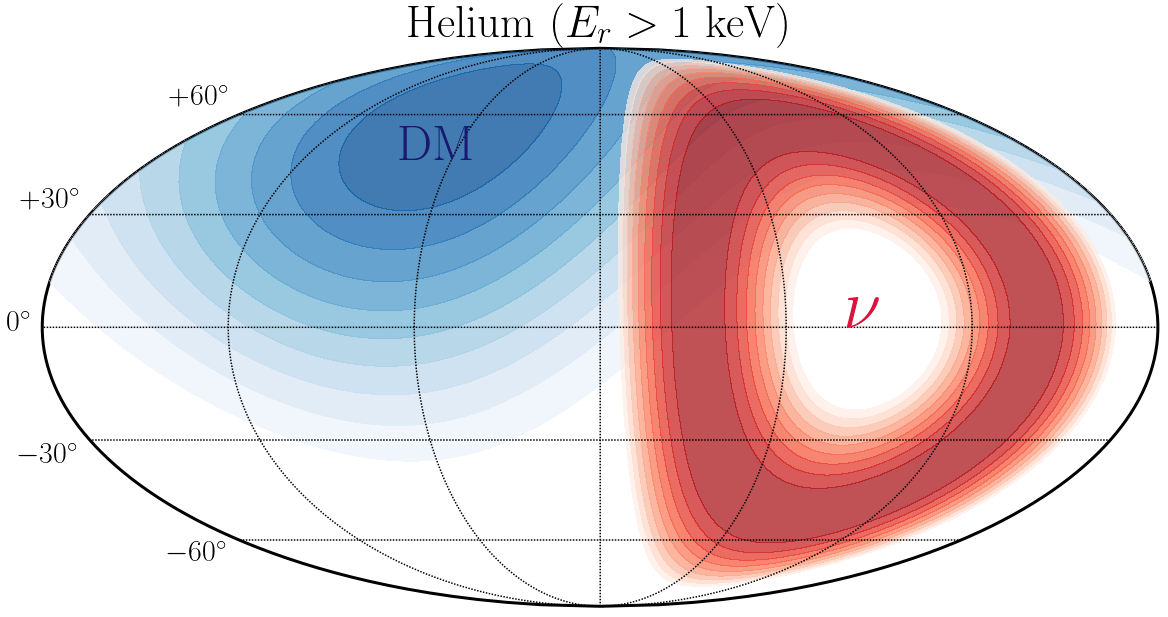

In [163]:
import matplotlib.colors as colors

plt.rcParams['axes.linewidth'] = 5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

cmap = plt.get_cmap('Reds')
new_reds = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=0, b=0.9),
        cmap(linspace(0, 0.9, 10)))
new_reds.set_bad('white')


cmap = plt.get_cmap('Blues')
new_blues = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=0, b=0.9),
        cmap(linspace(0, 0.9, 10)))
new_blues.set_bad('white')

#dR_mapn[dR_mapn<0.01] = nan
#dR_mapw[dR_mapw<0.01] = nan

m = Basemap(projection='moll',lon_0=180.0,resolution='c',celestial=True)

m.contourf(PH*180/pi, TH*180/pi-90.0, dR_mapw,levels=linspace(0.2,1,10),edgecolor="face",linestyle='none',cmap=new_blues,latlon=True,alpha=0.4)
m.contourf(PH*180/pi, TH*180/pi-90.0, dR_mapw,levels=linspace(0.2,1,10),edgecolor="face",linestyle='none',cmap=new_blues,latlon=True,alpha=0.4)
m.contourf(PH*180/pi, TH*180/pi-90.0, dR_mapw,levels=linspace(0.2,1,10),edgecolor="face",linestyle='none',cmap=new_blues,latlon=True,alpha=0.4)
#m.contour(PH*180/pi, TH*180/pi-90.0, dR_mapw,levels=linspace(0.2,1,10), cmap=new_blues,latlon=True)

m.contourf(PH*180/pi, TH*180/pi-90.0, dR_mapn,levels=linspace(0.4,1,10),edgecolor="face", cmap=new_reds,latlon=True,alpha=0.35)
m.contourf(PH*180/pi, TH*180/pi-90.0, dR_mapn,levels=linspace(0.4,1,10),edgecolor="face", cmap=new_reds,latlon=True,alpha=0.35)
m.contourf(PH*180/pi, TH*180/pi-90.0, dR_mapn,levels=linspace(0.4,1,10),edgecolor="face", cmap=new_reds,latlon=True,alpha=0.35)
#m.contour(PH*180/pi, TH*180/pi-90.0, dR_mapn,levels=linspace(0.2,1,10), cmap=new_reds,latlon=True,linewidth=3)

m.drawparallels(arange(-90.,120.,30.),labels=[1,0,0,0],color='k',fontsize=30,linewidth=1.5) # draw parallels
m.drawmeridians([60.0,120.,180.0,240.0,300.0],color='k',fontsize=30,linewidth=1.5) # draw meridians
m.drawmapboundary(linewidth=3)
plt.annotate(r"DM", xy=(0.32, 0.8), xycoords='axes fraction',fontsize=50,color="midnightblue")
plt.annotate(r"$\nu$", xy=(0.72, 0.5), xycoords='axes fraction',fontsize=70,color="crimson")

#cbar = plt.colorbar(orientation='horizontal',pad=0.02,extend='both')
#cbar.ax.set_xticklabels([r'$^{\bf 8}${\bf B neutrinos}',r'{\bf Dark matter}'])
#cbar.ax.tick_params(labelsize=40,length=0,pad=20)
plt.title(tit,fontsize=45)
plt.show()

fig.savefig('../plots/'+fname,bbox_inches='tight')

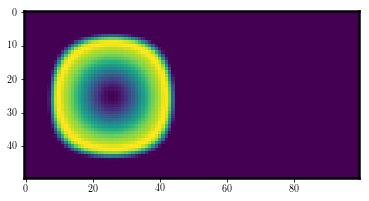

In [42]:
origin = 'lower'

delta = 0.025

x = y = arange(-3.0, 3.01, delta)
X, Y = meshgrid(x, y)
Z1 = exp(-X**2 - Y**2)
Z2 = exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

nr, nc = Z.shape

# put NaNs in one corner:
Z[-nr // 6:, -nc // 6:] = nan
# contourf will convert these to masked


Z = np.ma.array(Z)
# mask another corner:
Z[:nr // 6, :nc // 6] = ma.masked

# mask a circle in the middle:
interior = np.sqrt((X**2) + (Y**2)) < 0.5
Z[interior] = np.ma.masked

# We are using automatic selection of contour levels;
# this is usually not such a good idea, because they don't
# occur on nice boundaries, but we do it here for purposes
# of illustration.

fig1, ax2 = plt.subplots(constrained_layout=True)
CS = ax2.contourf(X, Y, Z, 10, cmap=plt.cm.bone, origin=origin)